In [1]:
from numpy.random import default_rng
import numpy as np

def black_scholes_sim(S0, r, sigma, T, N, M):
    dt = T / N
    paths = np.zeros((M, N + 1))
    paths[:, 0] = S0
    
    for i in range(1, N + 1):
        rand_nums = default_rng().standard_normal(M)
        paths[:, i] = paths[:, i-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * rand_nums)
    
    return paths

# Parameters
S0 = 15                # initial stock price
r = 0.08               # risk-free rate
sigma_p = 0.25         # volatility for positive correlation
sigma_n = 0.25         # volatility for negative correlation
T = 1.0 * 20           # time in years
N = 600               # number of time steps
M = 1                  # number of simulations

# Simulate stock prices using Black-Scholes model
S_p = black_scholes_sim(S0, r, sigma_p, T, N, M)
S_p[0]

array([15.        , 15.60203165, 15.52841253, 16.13942293, 16.42934603,
       16.5063344 , 16.76695566, 17.31314213, 15.64824979, 16.11762707,
       16.43723363, 17.18548925, 16.85481638, 16.24815813, 14.64264071,
       14.91408526, 15.12108767, 15.51006217, 15.47345492, 16.21507096,
       17.03138933, 19.44633222, 19.4348979 , 19.44819556, 20.10930586,
       21.39914042, 20.30738303, 18.75938678, 18.74165228, 18.54586436,
       17.44929453, 18.49508819, 18.03199295, 18.22792275, 17.86014524,
       18.62238422, 17.7247876 , 16.95354351, 16.92219345, 17.05919983,
       16.75092384, 15.37533833, 16.42643132, 15.72333424, 15.78592859,
       16.06224131, 15.99887138, 16.27136051, 17.56044393, 17.77517508,
       17.63142358, 18.60737334, 19.00809799, 19.15545671, 18.29295027,
       17.68467264, 17.16382324, 17.31528646, 17.855635  , 17.545279  ,
       17.40028215, 17.40587985, 18.03688161, 18.32696155, 19.10980579,
       18.37349162, 18.53149499, 18.2798713 , 18.48508104, 18.18

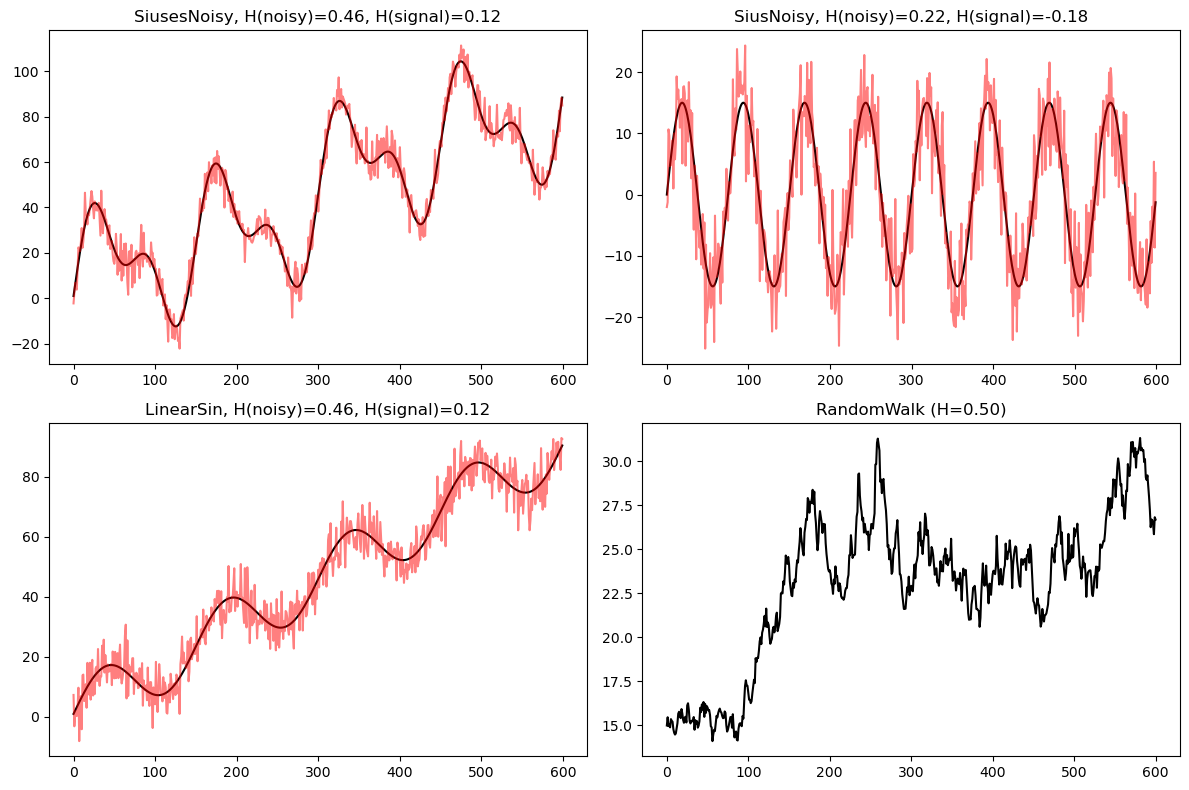

In [81]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
from synthgen import SyntheticDatasetGenerator
from hurst import compute_Hc

def black_scholes_sim(S0, r, sigma, T, N, M):
    dt = T / N
    paths = np.zeros((M, N + 1))
    paths[:, 0] = S0
    
    for i in range(1, N + 1):
        rand_nums = default_rng().standard_normal(M)
        paths[:, i] = paths[:, i-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * rand_nums)
    
    return paths

# Parameters
S0 = 15                # initial stock price
r = 0.08               # risk-free rate
sigma_p = 0.15         # tuned volatility for better resemblance
T = 1.0 * 20           # time in years
N = 600                # number of time steps
M = 1                  # number of simulations

# Simulate stock prices using Black-Scholes model
S_p = black_scholes_sim(S0, r, sigma_p, T, N, M)
RandomWalk = S_p[0]

# Define the datasets
SiusesNoisy = SyntheticDatasetGenerator(length=600)
SiusesNoisy.add_sin_wave(amplitude=15, frequency=8)
SiusesNoisy.add_sin_wave(amplitude=5, frequency=2)
SiusesNoisy.add_sin_wave(amplitude=25, frequency=4)
SiusesNoisy.add_linear_trend(0.15, intercept=1)
SiusesNoisyOG = SiusesNoisy.data
SiusesNoisy.add_noise(mean=15, std=5)

SiusNoisy = SyntheticDatasetGenerator(length=600)
SiusNoisy.add_sin_wave(amplitude=15, frequency=8)
SiusNoisyOG = SiusNoisy.data
SiusNoisy.add_noise(mean=15, std=5)

LinearSin = SyntheticDatasetGenerator(length=600)
LinearSin.add_sin_wave(amplitude=10, frequency=4)
LinearSin.add_linear_trend(0.15, intercept=1)
LinearSinOG = LinearSin.data
LinearSin.add_noise(mean=15, std=5)

RandomWal = SyntheticDatasetGenerator(length=600)

# Compute Hurst exponent for each dataset
H0, c0, data0 = compute_Hc(SiusesNoisy.data)
H0_, c0, data0 = compute_Hc(SiusesNoisyOG)
H1, c1, data1 = compute_Hc(SiusNoisy.data)
H1_, c1, data1 = compute_Hc(SiusNoisyOG)
H2, c2, data2 = compute_Hc(LinearSin.data)
H2_, c2, data2 = compute_Hc(LinearSinOG)
H3, c3, data3 = compute_Hc(RandomWalk)

# Plot the datasets with Hurst exponent in titles
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].plot(SiusesNoisyOG, color='black')
axes[0, 0].plot(SiusesNoisy.data, color='red', alpha=0.5)
axes[0, 0].set_title(f'SiusesNoisy, H(noisy)={H0:.2f}, H(signal)={H0_:.2f}')

axes[0, 1].plot(SiusNoisyOG, color='black')
axes[0, 1].plot(SiusNoisy.data, color='red', alpha=0.5)
axes[0, 1].set_title(f'SiusNoisy, H(noisy)={H1:.2f}, H(signal)={H1_:.2f}',)

axes[1, 0].plot(LinearSinOG, color='black')
axes[1, 0].plot(LinearSin.data, color='red', alpha=0.5)
axes[1, 0].set_title(f'LinearSin, H(noisy)={H0:.2f}, H(signal)={H0_:.2f}')

axes[1, 1].plot(RandomWalk, color='black')
axes[1, 1].set_title(f'RandomWalk (H={H3:.2f})')

plt.tight_layout()
plt.show()

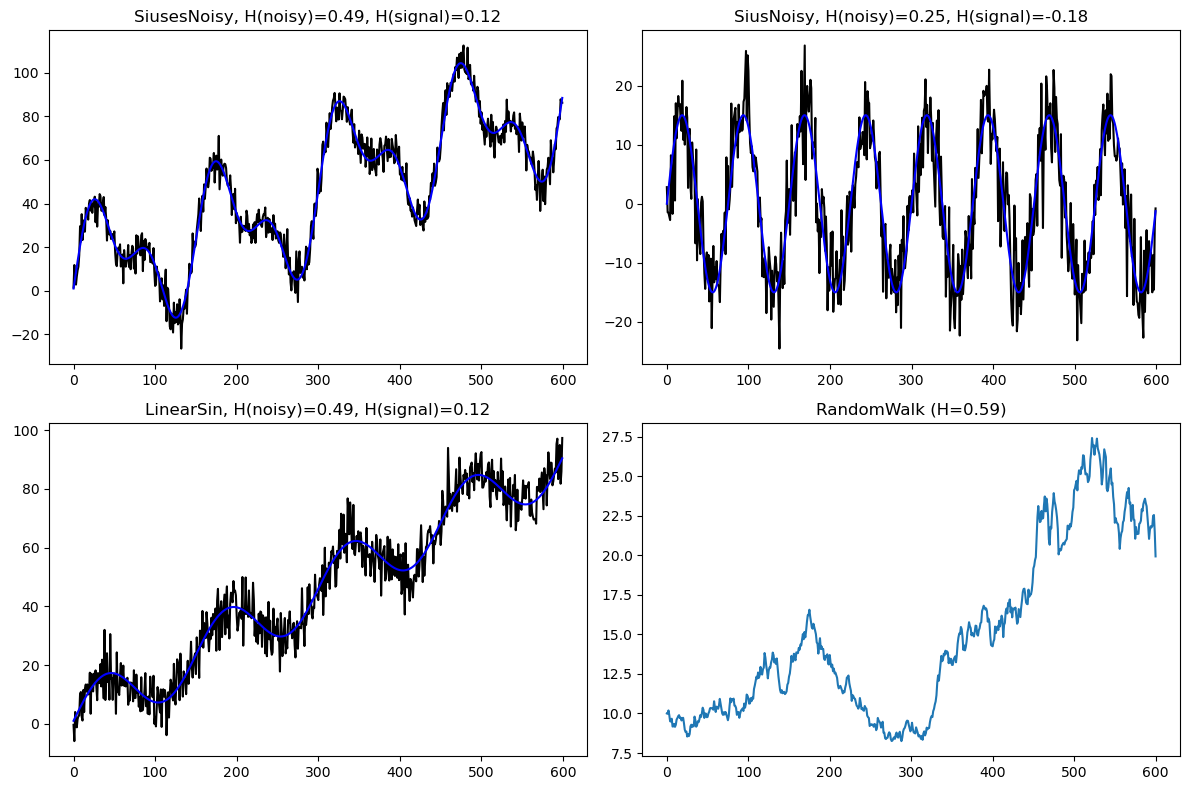

In [79]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
from synthgen import SyntheticDatasetGenerator
from hurst import compute_Hc

def black_scholes_sim(S0, r, sigma, T, N, M):
    dt = T / N
    paths = np.zeros((M, N + 1))
    paths[:, 0] = S0
    
    for i in range(1, N + 1):
        rand_nums = default_rng().standard_normal(M)
        paths[:, i] = paths[:, i-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * rand_nums)
    
    return paths

# Parameters
S0 = 10                # initial stock price
r = 0.04               # risk-free rate
sigma_p = 0.15         # tuned volatility for better resemblance
T = 1.0 * 20           # time in years
N = 600                # number of time steps
M = 1                  # number of simulations

# Simulate stock prices using Black-Scholes model
S_p = black_scholes_sim(S0, r, sigma_p, T, N, M)
RandomWalk = S_p[0]

# Define the datasets
SiusesNoisy = SyntheticDatasetGenerator(length=600)
SiusesNoisy.add_sin_wave(amplitude=15, frequency=8)
SiusesNoisy.add_sin_wave(amplitude=5, frequency=2)
SiusesNoisy.add_sin_wave(amplitude=25, frequency=4)
SiusesNoisy.add_linear_trend(0.15, intercept=1)
SiusesNoisyOG = SiusesNoisy.data
SiusesNoisy.add_noise(mean=15, std=5)

SiusNoisy = SyntheticDatasetGenerator(length=600)
SiusNoisy.add_sin_wave(amplitude=15, frequency=8)
SiusNoisyOG = SiusNoisy.data
SiusNoisy.add_noise(mean=15, std=5)

LinearSin = SyntheticDatasetGenerator(length=600)
LinearSin.add_sin_wave(amplitude=10, frequency=4)
LinearSin.add_linear_trend(0.15, intercept=1)
LinearSinOG = LinearSin.data
LinearSin.add_noise(mean=15, std=5)

RandomWal = SyntheticDatasetGenerator(length=600)

# Compute Hurst exponent for each dataset
H0, _, _ = compute_Hc(SiusesNoisy.data)
H0_, _, _ = compute_Hc(SiusesNoisyOG)
H1, _, _ = compute_Hc(SiusNoisy.data)
H1_, _, _ = compute_Hc(SiusNoisyOG)
H2, _, _ = compute_Hc(LinearSin.data)
H2_, _, _ = compute_Hc(LinearSinOG)
H3, _, _ = compute_Hc(RandomWalk)

# Plot the datasets with Hurst exponent in titles
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].plot(SiusesNoisy.data, color='black')# , alpha=0.5)
axes[0, 0].plot(SiusesNoisyOG, color='blue')
axes[0, 0].set_title(f'SiusesNoisy, H(noisy)={H0:.2f}, H(signal)={H0_:.2f}')

axes[0, 1].plot(SiusNoisy.data, color='black') #, alpha=0.5)
axes[0, 1].plot(SiusNoisyOG, color='blue')
axes[0, 1].set_title(f'SiusNoisy, H(noisy)={H1:.2f}, H(signal)={H1_:.2f}')

axes[1, 0].plot(LinearSin.data, color='black') #, alpha=0.5)
axes[1, 0].plot(LinearSinOG, color='blue')
axes[1, 0].set_title(f'LinearSin, H(noisy)={H0:.2f}, H(signal)={H0_:.2f}')

axes[1, 1].plot(RandomWalk)
axes[1, 1].set_title(f'RandomWalk (H={H3:.2f})')

plt.tight_layout()
plt.show()

In [250]:
import torch


# Convert the data to a PyTorch tensor
tensor_data = torch.from_numpy(RandomWalk).unsqueeze(0).unsqueeze(-1).float()

# Normalize the input tensor
ts_mean, ts_var = (
    torch.mean(tensor_data, dim=1, keepdim=True),
    torch.var(tensor_data, dim=1, keepdim=True) + 1e-5,
)
normalized_ts_data = (tensor_data - ts_mean) / torch.sqrt(ts_var)

# Perform real fast Fourier transform on the input tensor
ts_frequency_data = torch.fft.rfft(input=normalized_ts_data, dim=1)

# Perform a low pass filter to remove high frequency noise
ts_frequency_data_filtered = ts_frequency_data.clone()
cutoff_frequency = tensor_data.shape[1] // 2 // 2 // 2 // 2 // 2
ts_frequency_data_filtered[0, cutoff_frequency:, 0] = 0

# Perform inverse real fast Fourier transform on the output tensor
norm_xy = torch.fft.irfft(ts_frequency_data_filtered.clone(), dim=1)

# Reverse normalization
xy = norm_xy * torch.sqrt(ts_var) + ts_mean


In [251]:
RandomWalkOG = xy[0, :, 0].numpy()
H3_, _, _ = compute_Hc(RandomWalkOG, kind='change')
H3_

0.2649051343248301

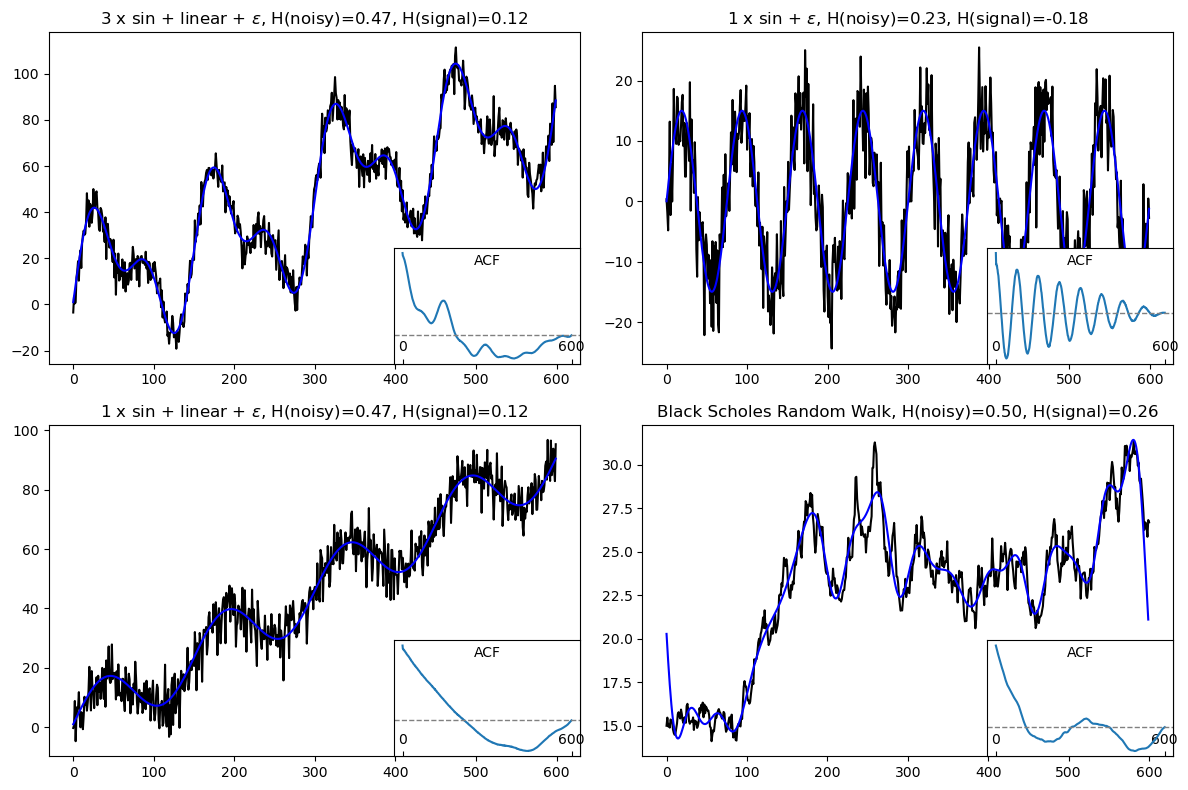

In [252]:
from statsmodels.tsa.stattools import acf

length = 600

def plot_dataset(ax, data, data_og, title, hurst_noisy, hurst_signal=None):
    ax.plot(data, color='black')
    if hurst_signal is not None:
        ax.plot(data_og, color='blue')
        ax.set_title(f'{title}, H(noisy)={hurst_noisy:.2f}, H(signal)={hurst_signal:.2f}')
    else:
        ax.set_title(f'{title} (H={hurst_noisy:.2f})')
    
    ax_acf = ax.inset_axes([0.65, 0., 0.35, 0.35])
    ax_acf.plot(acf(data, nlags=length))
    ax_acf.axhline(y=0, color='gray', linestyle='--', linewidth=1)
    ax_acf.set_xticks([0, length])
    ax_acf.tick_params(axis='x', direction="in", pad=-17, labelrotation=0)
    ax_acf.set_yticks([])
    ax_acf.set_xlabel('')
    ax_acf.text(0.5, 0.95, 'ACF', transform=ax_acf.transAxes, ha='center', va='top')

# Plot the datasets with Hurst exponent in titles and autocorrelation functions in the bottom right corner
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

plot_dataset(axes[0, 0], SiusesNoisy.data, SiusesNoisyOG, '3 x sin + linear + $\epsilon$', H0, H0_)
plot_dataset(axes[0, 1], SiusNoisy.data, SiusNoisyOG, '1 x sin + $\epsilon$', H1, H1_)
plot_dataset(axes[1, 0], LinearSin.data, LinearSinOG, '1 x sin + linear + $\epsilon$', H0, H0_)
plot_dataset(axes[1, 1], RandomWalk, RandomWalkOG, 'Black Scholes Random Walk', H3, H3_)

plt.tight_layout()
plt.show()

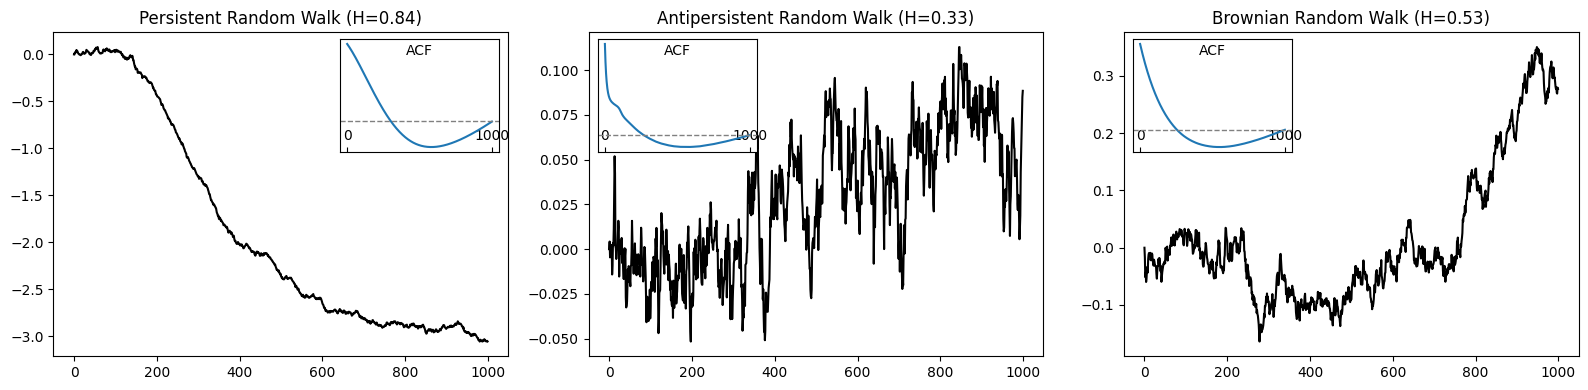

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from hurst import compute_Hc, random_walk


def plot_dataset(ax, data, acf_data, title, hurst):
    ax.plot(data, color='black')
    ax.set_title(f'{title} (H={hurst:.2f})')
    
    if title == "Persistent Random Walk":
        ax_acf = ax.inset_axes([0.63, 0.63, 0.35, 0.35])
    else:
        ax_acf = ax.inset_axes([0.02, 0.63, 0.35, 0.35])
    ax_acf.plot(acf_data)
    ax_acf.axhline(y=0, color='gray', linestyle='--', linewidth=1)
    ax_acf.set_xticks([0, length])
    ax_acf.tick_params(axis='x', direction="in", pad=-17, labelrotation=0)
    ax_acf.set_yticks([])
    ax_acf.set_xlabel('')
    ax_acf.text(0.5, 0.95, 'ACF', transform=ax_acf.transAxes, ha='center', va='top')

# Set parameters
num_simulations = 10000
length = 1000

# Generate random walks with different probabilities
brownian_sims = [random_walk(length, proba=0.5) for _ in range(num_simulations)]
persistent_sims = [random_walk(length, proba=0.8) for _ in range(num_simulations)]
antipersistent_sims = [random_walk(length, proba=0.3) for _ in range(num_simulations)]

# Compute mean and mean ACF for each set of simulations
brownian_mean = np.mean(brownian_sims, axis=0)
persistent_mean = np.mean(persistent_sims, axis=0)
antipersistent_mean = np.mean(antipersistent_sims, axis=0)

brownian_acf_mean = np.mean([acf(sim, nlags=length) for sim in brownian_sims], axis=0)
persistent_acf_mean = np.mean([acf(sim, nlags=length) for sim in persistent_sims], axis=0)
antipersistent_acf_mean = np.mean([acf(sim, nlags=length) for sim in antipersistent_sims], axis=0)

# Compute mean Hurst exponents for each set of simulations
H_brownian = np.mean([compute_Hc(sim)[0] for sim in brownian_sims])
H_persistent = np.mean([compute_Hc(sim)[0] for sim in persistent_sims])
H_antipersistent = np.mean([compute_Hc(sim)[0] for sim in antipersistent_sims])

# Plot the mean datasets with mean Hurst exponent in titles and mean autocorrelation functions in the bottom right corner
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

plot_dataset(axes[0], persistent_mean, persistent_acf_mean, 'Persistent Random Walk', H_persistent)
plot_dataset(axes[1], antipersistent_mean, antipersistent_acf_mean, 'Antipersistent Random Walk', H_antipersistent)
plot_dataset(axes[2], brownian_mean, brownian_acf_mean, 'Brownian Random Walk', H_brownian)
# plt.suptitle(f'Mean of {num_simulations} Simulated Random Walks and their ACF', fontsize=16)
plt.tight_layout()
plt.show()